In [1]:
import re
import string
import pickle

# Import utility libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sn

%matplotlib inline
# Import libraries for text manipulation
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Import modules for evaluation purposes
# Import libraries for predcton
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,auc,f1_score
from wordcloud import WordCloud
import nltk
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
!pip install TextBlob
!python -m textblob.download_corpora
# nltk.download('punkt')
# nltk.download('wordnet') 
# nltk.download('averaged_perceptron_tagger')

import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords

from textblob import TextBlob, Word

from nltk.tokenize import word_tokenize  
import collections


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\ShruthiShanbogRamamu\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ShruthiShanbogRamamu\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ShruthiShanbogRamamu\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ShruthiShanbogRamamu\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\ShruthiShanbogRamamu\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_d

In [2]:
### Loading Data post flitring on (Driscolls_Views_IN_TABLEAU.csv) 
data=pd.read_csv("final.csv")

In [3]:
data.head(5)

,Unnamed: 0,System,Dashboard ID,Dashboard Name,Project,Usage Count,# of Unique Users,Table Count,Created Date (UTC),Updated Date (UTC),Last Accessed Date (UTC),date_date,converted_last,new_lastacess,days_between
0,1,TABLEAU,d74e3b45-17f2-4124-b62b-d7f09210b555,Pallet Summary by Order by Day,Distribution,31,4,3,12/06/2019 15:32:32,01/03/2020 21:55:13,03/02/2020 21:39:42,2019-12-06,2020-03-02,2020-03-02,87
1,18,TABLEAU,8b97fcdb-6cb8-400a-b905-69a6745b0c0b,Degradings Detailed View,DEMEA QC,128,19,7,01/08/2020 00:05:52,01/08/2020 00:05:52,04/16/2020 08:59:27,2020-01-08,2020-04-16,2020-04-16,99
2,19,TABLEAU,fe97818f-0c0c-4cfd-b9b6-a51447a90f1d,Product Leader - Blueberries,DEMEA S&OP,36,8,3,06/19/2019 14:14:58,03/26/2020 07:37:35,04/16/2020 07:40:14,2019-06-19,2020-04-16,2020-04-16,302
3,20,TABLEAU,ee1a9c44-08b0-447b-9240-280d2ca80847,CHL Fruit Details,DEMEA S&OP,52,5,4,01/17/2020 15:05:53,01/21/2020 21:21:44,04/07/2020 07:03:50,2020-01-17,2020-04-07,2020-04-07,81
4,21,TABLEAU,95718e2e-551b-4a8a-b378-89193d8238e1,Product Leader - Raspberries,DEMEA S&OP,64,8,6,01/14/2020 16:55:30,01/14/2020 16:55:30,04/14/2020 10:38:24,2020-01-14,2020-04-14,2020-04-14,91


In [4]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
stop_words = stopwords+['report','dashboard','reports','data','v','vs']
# stop_words1= stop_words.remove('so')
stop_words.remove('so')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ShruthiShanbogRamamu\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
len(stop_words)

184

# Preprocessing 

In [6]:
def initial_preprocessing(text):
    if('_' in text):
        text=text.replace('_',' ')
    if('-' in text):
        text=text.replace('-',' ')
    return text


def remove_num(text):
    newstring = ''.join([i for i in text if not i.isdigit()])
    return newstring

def lemmatization(text):
    text= wnl.lemmatize(text)
    return text
     

def punct(string):
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    for x in string.lower():
        if x in punctuations:
            string = string.replace(x, "")
    return string

def remove_stop_word(text):
    """Convert all characters to lowercase from raw text"""
    words_ = str(text).lower().split()
    """Remove stop words from list of tokenized words"""
    cleaned_words = []
    for word in words_:
        if word not in stop_words:
            cleaned_words.append(word)
    return " ".join(cleaned_words)


def main(text):
    initial=initial_preprocessing(text)
    num =remove_num(initial)
    pun=punct(num)
    stop =remove_stop_word(pun)
  # number(text)
    return  stop



In [8]:
def processing(read_data):
    d = pd.DataFrame()
  # convert into a seperate data frame
    d['Dashboard Name']= read_data['Dashboard Name'].unique()
    dashboards=[main(i) for i in d['Dashboard Name'].unique()]
    d['Preprossed1']=dashboards
    d['Preprossed']=d['Preprossed1'].str.lower()
    lis=[]
    for i in d['Preprossed'].tolist():
        lis.append(i)
    fin=[]
    for i in lis:
        s = TextBlob(i)
        lemmatized_sentence = " ".join([w.lemmatize() for w in s.words])
        fin.append(lemmatized_sentence)
    d['Lemmatized preprocessed'] =fin
    return d

In [9]:
post_lemmatization=processing(data)
post_lemmatization

,Dashboard Name,Preprossed1,Preprossed,Lemmatized preprocessed
0,Pallet Summary by Order by Day,pallet summary order day,pallet summary order day,pallet summary order day
1,Degradings Detailed View,degradings detailed view,degradings detailed view,degradings detailed view
2,Product Leader - Blueberries,product leader blueberries,product leader blueberries,product leader blueberry
3,CHL Fruit Details,chl fruit details,chl fruit details,chl fruit detail
4,Product Leader - Raspberries,product leader raspberries,product leader raspberries,product leader raspberry
...,...,...,...,...
1020,Blackberry Daily Harvest Order Action Strategy,blackberry daily harvest order action strategy,blackberry daily harvest order action strategy,blackberry daily harvest order action strategy
1021,Daily Pulse,daily pulse,daily pulse,daily pulse
1022,Dax Certified Receipts for Month End Accrual G...,dax certified receipts month end accrual gf,dax certified receipts month end accrual gf,dax certified receipt month end accrual gf
1023,Vol by Berry 2019,vol berry,vol berry,vol berry


In [10]:
len(post_lemmatization['Lemmatized preprocessed'].unique())

997

In [11]:
post_lemmatization.to_csv("data_post_preprocess.csv",index=False)

In [12]:
new_set =  processing(data)

In [13]:
new_set

,Dashboard Name,Preprossed1,Preprossed,Lemmatized preprocessed
0,Pallet Summary by Order by Day,pallet summary order day,pallet summary order day,pallet summary order day
1,Degradings Detailed View,degradings detailed view,degradings detailed view,degradings detailed view
2,Product Leader - Blueberries,product leader blueberries,product leader blueberries,product leader blueberry
3,CHL Fruit Details,chl fruit details,chl fruit details,chl fruit detail
4,Product Leader - Raspberries,product leader raspberries,product leader raspberries,product leader raspberry
...,...,...,...,...
1020,Blackberry Daily Harvest Order Action Strategy,blackberry daily harvest order action strategy,blackberry daily harvest order action strategy,blackberry daily harvest order action strategy
1021,Daily Pulse,daily pulse,daily pulse,daily pulse
1022,Dax Certified Receipts for Month End Accrual G...,dax certified receipts month end accrual gf,dax certified receipts month end accrual gf,dax certified receipt month end accrual gf
1023,Vol by Berry 2019,vol berry,vol berry,vol berry


In [15]:
#new_set.reset_index(drop=True,inplace=True)

In [16]:
new_set=new_set.drop(columns=["Preprossed1","Preprossed"])
new_set=new_set.drop_duplicates(subset =['Lemmatized preprocessed'])
dim1= len(new_set['Lemmatized preprocessed'].unique())
new_set['Masked Dashboard Name']= ['Dash'+str(i) for i in range(dim1)]

In [19]:
new_set.head()

,Dashboard Name,Lemmatized preprocessed,Masked Dashboard Name
0,Pallet Summary by Order by Day,pallet summary order day,Dash0
1,Degradings Detailed View,degradings detailed view,Dash1
2,Product Leader - Blueberries,product leader blueberry,Dash2
3,CHL Fruit Details,chl fruit detail,Dash3
4,Product Leader - Raspberries,product leader raspberry,Dash4


In [36]:
new_set.isnull().sum()

Dashboard Name             0
Lemmatized preprocessed    0
Masked Dashboard Name      0
dtype: int64

In [38]:
def word_frequency(sentence):
  # joins all the sentenses
    sentence =" ".join(sentence)
    new_tokens = word_tokenize(sentence)
    counted = collections.Counter(new_tokens)
    word_freq = pd.DataFrame(counted.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
    return word_freq

In [39]:
dash_list = new_set['Lemmatized preprocessed'].unique().tolist()

In [272]:
# dash_list

In [40]:
word_freq = word_frequency(dash_list)
word_freq

,word,frequency
93,sale,49
2,order,49
98,forecast,40
305,week,39
124,customer,38
...,...,...
525,midrange,1
524,krogerfillratereport,1
523,information,1
521,paul,1


In [42]:
word_freq.to_csv("vocabularycountfinal.csv")

# tf-idf vectorizer


In [45]:
tfidf = TfidfVectorizer()
  # get tf-df values
result = tfidf.fit_transform(new_set['Lemmatized preprocessed'].unique())
  # representing in the format of a matrix
td1 = pd.DataFrame(result.todense())  
td1.columns = tfidf.get_feature_names()
term_document_matrix1 = td1.T
term_document_matrix1.columns = ['Dash'+str(i) for i in range(dim1)]
new_mat= term_document_matrix1.transpose()
print("Printing the DTM of the Train Data")
print(new_mat)
print("\n")

Printing the DTM of the Train Data
         abertos  account   accrual  accuracy  acre  acreage  act    action  \
Dash0        0.0      0.0  0.000000       0.0   0.0      0.0  0.0  0.000000   
Dash1        0.0      0.0  0.000000       0.0   0.0      0.0  0.0  0.000000   
Dash2        0.0      0.0  0.000000       0.0   0.0      0.0  0.0  0.000000   
Dash3        0.0      0.0  0.000000       0.0   0.0      0.0  0.0  0.000000   
Dash4        0.0      0.0  0.000000       0.0   0.0      0.0  0.0  0.000000   
...          ...      ...       ...       ...   ...      ...  ...       ...   
Dash992      0.0      0.0  0.000000       0.0   0.0      0.0  0.0  0.000000   
Dash993      0.0      0.0  0.000000       0.0   0.0      0.0  0.0  0.472465   
Dash994      0.0      0.0  0.000000       0.0   0.0      0.0  0.0  0.000000   
Dash995      0.0      0.0  0.423439       0.0   0.0      0.0  0.0  0.000000   
Dash996      0.0      0.0  0.000000       0.0   0.0      0.0  0.0  0.000000   

         active 

In [46]:
di2=len(tfidf.get_feature_names())
# finally converting into a array for the matrix
matrix= result.toarray()
tf_value=[]
for i in matrix:
    tf_value.append(i)

In [47]:
matrix.shape

(997, 931)

In [49]:
len(tf_value)

997

In [50]:
pickle.dump(tfidf, open("tfidf_entiredata_New.pkl", "wb"))

In [51]:
td2=pd.DataFrame(new_mat)

In [52]:
td2

,abertos,account,accrual,accuracy,acre,acreage,act,action,active,activity,...,wrap,wsp,yago,year,yield,yoy,ytd,zac,zam,zamora
Dash0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dash1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dash2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dash3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dash4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Dash992,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dash993,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.472465,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dash994,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dash995,0.0,0.0,0.423439,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
#td2.to_csv("tf_idf_data.csv")

In [54]:
td2.reset_index(drop=False,inplace=True)

In [55]:
td2.head(2)

,level_0,abertos,account,accrual,accuracy,acre,acreage,act,action,active,...,wrap,wsp,yago,year,yield,yoy,ytd,zac,zam,zamora
0,Dash0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Dash1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
td3=pd.DataFrame()
td3['Original Name']=new_set['Dashboard Name']
td3['Dashboard Name']=new_set['Lemmatized preprocessed']
td3['Masked Name']=['Dash'+str(i) for i in range(dim1)]
td3['tf-idf']=tf_value
td3.head()

,Original Name,Dashboard Name,Masked Name,tf-idf
0,Pallet Summary by Order by Day,pallet summary order day,Dash0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,Degradings Detailed View,degradings detailed view,Dash1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,Product Leader - Blueberries,product leader blueberry,Dash2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,CHL Fruit Details,chl fruit detail,Dash3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,Product Leader - Raspberries,product leader raspberry,Dash4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [57]:
td3['Dashboard Name'].value_counts()

forecast actual harvest order              1
plantación                                 1
traceability order customer master name    1
demea supply forecast performance          1
dax certified receipt flash variance       1
                                          ..
growing degree day                         1
limited edition reference                  1
huddle berry                               1
cmex black                                 1
krogermasterreport                         1
Name: Dashboard Name, Length: 997, dtype: int64

In [58]:
td3.shape

(997, 4)

In [60]:
### read train data 
pre_train_sample = pd.read_csv("traindata_final.csv")
train_names = pre_train_sample['Original Name'].unique().tolist()

In [155]:
new_train_samples = td3[td3['Original Name'].isin(train_names)].reset_index(drop=True)

In [156]:
new_train_samples.shape

(896, 4)

In [157]:
new_train_samples

,Original Name,Dashboard Name,Masked Name,tf-idf
0,Pallet Summary by Order by Day,pallet summary order day,Dash0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,Product Leader - Blueberries,product leader blueberry,Dash2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,CHL Fruit Details,chl fruit detail,Dash3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,Product Leader - Raspberries,product leader raspberry,Dash4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,OV - CMP Dashboard,ov cmp,Dash5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...
891,Widmann Analysis 2019 # pallets,widmann analysis pallet,Dash989,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
892,OV - DEMEA Quality Allocation,ov demea quality allocation,Dash991,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
893,Blueberry Report by Pack,blueberry pack,Dash992,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
894,Daily Pulse,daily pulse,Dash994,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [335]:
new_test_samples = td3[~td3['Original Name'].isin(train_names)].reset_index(drop=True)

In [336]:
new_test_samples.shape

(101, 4)

In [337]:
new_test_samples

,Original Name,Dashboard Name,Masked Name,tf-idf
0,Degradings Detailed View,degradings detailed view,Dash1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,Grower Economics - weekly supply,grower economics weekly supply,Dash14,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,Nursery Order Status Report,nursery order status,Dash27,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,Pricing - PPV,pricing ppv,Dash31,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,Casey Report,casey,Dash45,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...
96,Report carrier volume PRT-ESP-MOR,carrier volume prt esp mor,Dash981,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
97,KGs Diarios por armazém,kg diarios por armazém,Dash985,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
98,OV - Sample Weights,ov sample weight,Dash990,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
99,Blackberry Daily Harvest Order Action Strategy,blackberry daily harvest order action strategy,Dash993,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.47246535..."


In [138]:
tfidf_result=[]
for i in new_train_samples['tf-idf']:
    tfidf_result.append(i)

In [139]:
len(tfidf_result)

896

# PCA on the matric to reduce the curse of dimentionality

[0.01132995 0.02228516 0.0326172  0.04238245 0.05160599 0.06043631
 0.06874922 0.07678733 0.08448231 0.09178961 0.09903045 0.10611152
 0.11298873 0.11962285 0.1261476  0.13251553 0.13868399 0.14480457
 0.15078889 0.15667803 0.16243141 0.16814568 0.17368901 0.1791671
 0.18455123 0.18989049 0.19517508 0.20037919 0.20556301 0.21063247
 0.21566358 0.22063361 0.22556858 0.23045144 0.23522077 0.2399245
 0.24457322 0.24913347 0.25368149 0.25814723 0.26258213 0.26699152
 0.27133502 0.27560121 0.27983895 0.28403746 0.28821624 0.29236578
 0.29648988 0.30057997 0.30464052 0.30865769 0.31260999 0.31655294
 0.32044219 0.32431476 0.3281611  0.33199333 0.3357949  0.33958148
 0.34331392 0.34700875 0.35069377 0.35434018 0.35796599 0.36154424
 0.36508017 0.36859373 0.37207641 0.3755351  0.3789866  0.38239116
 0.38578565 0.38914804 0.39249984 0.39580614 0.39909284 0.4023487
 0.40554446 0.40873009 0.41190278 0.41505522 0.41817193 0.42127087
 0.42434341 0.42737727 0.43038334 0.43335722 0.43632508 0.4392728

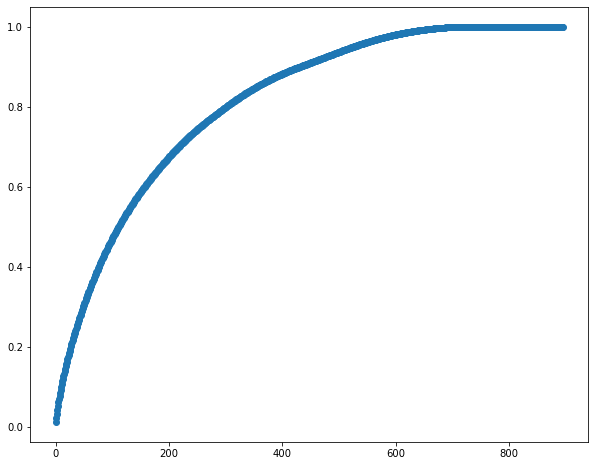

In [376]:
# scaling=StandardScaler()
 
# # Use fit and transform method
# scaling.fit(tfidf_result)
# Scaled_data=scaling.transform(tfidf_result)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(tfidf_result)


# ## perform pca to get the number of PCA components
pca = PCA()
pca.fit(data_rescaled)
print(pca.explained_variance_ratio_.cumsum())
plt.figure(figsize=(10,8))
plt.plot(pca.explained_variance_ratio_.cumsum(),marker='o',linestyle='--')


# pca = PCA(n_components = 0.90)
# pca.fit(Scaled_data)
# reduced = pca.transform(Scaled_data)

principal=PCA(n_components=0.95)
principal.fit(data_rescaled)
pca_output =principal.transform(data_rescaled)

In [377]:
pca_output.shape

(896, 527)

In [378]:
pd.DataFrame(pca_output)

,0,1,2,3,4,5,6,7,8,9,...,517,518,519,520,521,522,523,524,525,526
0,-0.201026,0.459667,-0.069311,0.154639,0.005006,0.018579,0.089967,-0.038742,0.072257,-0.124218,...,-0.006624,0.013650,0.004409,-0.000686,-0.000371,-0.016209,-0.010374,-0.025544,-0.008070,-0.017935
1,0.090284,-0.043623,0.149859,-0.084850,-0.001573,0.120620,-0.056533,0.340258,-0.243099,-0.407801,...,0.003112,0.015973,-0.010839,-0.001178,0.003352,0.004796,-0.006778,0.004091,0.007545,-0.003242
2,0.067462,0.043770,-0.130837,-0.079971,-0.189422,0.199751,0.079727,0.070440,-0.001063,0.230854,...,-0.078297,0.098681,-0.033531,-0.092406,-0.020053,-0.011418,-0.064845,-0.047779,-0.033614,-0.053062
3,0.020453,-0.051261,0.039385,-0.061668,-0.064061,0.076123,-0.009146,0.120277,-0.099577,-0.059101,...,0.002540,0.006045,-0.006809,0.003584,-0.003942,0.010008,0.002987,-0.016870,0.006460,0.002439
4,-0.042761,-0.105942,0.014664,0.010768,-0.000051,-0.019718,-0.003930,0.108267,0.113609,0.154809,...,0.021542,-0.067069,0.041438,-0.184403,-0.106878,-0.117957,-0.056354,0.176433,-0.046319,0.065849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,-0.027055,-0.017985,-0.008370,-0.047128,0.018603,-0.041656,-0.008804,0.058391,-0.039464,-0.045728,...,-0.125411,-0.041447,0.032802,0.001089,0.114465,0.052364,0.023956,0.096990,0.115609,0.065546
892,-0.135902,-0.279688,-0.001480,0.326709,-0.006003,0.036711,0.068384,0.043234,0.195834,0.185139,...,-0.007605,-0.015312,0.004046,0.012727,0.049464,0.037261,-0.015147,-0.034894,0.005652,-0.062164
893,0.109378,-0.007328,0.148158,-0.110890,0.001971,0.112068,-0.069025,0.315421,-0.237342,-0.503844,...,0.003462,0.007838,0.002030,-0.023196,0.014834,-0.042160,-0.029732,0.003153,-0.026371,-0.003586
894,0.021801,0.031121,0.292212,-0.142743,0.304478,0.242318,0.131709,-0.128895,0.092272,0.037862,...,-0.050916,0.018760,0.079337,-0.042667,0.044823,-0.077758,-0.069404,0.034159,-0.030565,0.042084


In [94]:
# principal.components_

In [142]:
pickle.dump(scaler, open("min_max_scaler.pkl", "wb"))

In [143]:
pickle.dump(principal, open("pca_loading.pkl", "wb"))

In [ ]:
### Kmeans

In [159]:
new_train_samples.shape

(896, 4)

In [276]:
## Import libraries
from nltk.cluster import KMeansClusterer
import nltk
import random
rng = random.Random()
rng.seed(123)

def clustering_creation(data,pca_output,NUM_CLUSTERS = 10):
    X = pca_output
    kclusterer = KMeansClusterer(
        NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance,avoid_empty_clusters=True,rng=rng)
    assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
    data['cluster'] = assigned_clusters
    data['centroid'] = data['cluster'].apply(lambda x: kclusterer.means()[x])
    return data,kclusterer

In [147]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

In [288]:
def get_word_cloud(data,cluster_number,exp_clusters):
    sub_set = data[data['cluster'] == cluster_number]
    comment_words = ''
    stopwords = set(STOPWORDS)
    # iterate through the csv file

    for val in sub_set['Dashboard Name']:
        val = str(val)
        tokens = val.split()
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
            tokens[i] = tokens[i].strip()
        comment_words += " ".join(tokens)+" "
    wordcloud = WordCloud(width = 800, height = 800, background_color ='white',stopwords = stopwords,min_font_size = 10).generate(comment_words)
    # plot the WordCloud image      
    print(f" wordcloud for cluster {cluster_number}")
    plt.figure(figsize = (8, 8), facecolor = None)
    cluster_distribution = data['cluster'].value_counts().rename_axis('cluster_number').reset_index(name='counts')
    folder = 'experiment/wordcloud_with_totalcluster_%s' % exp_clusters
    if not os.path.exists(folder):
        os.makedirs(folder)
    file_path = os.path.join(folder, 'wordcloud_cluster_'+str(cluster_number)+'.png')   
    wordcloud.to_file(file_path)
    file_path = os.path.join(folder,'cluster_distribution.csv')
    cluster_distribution.to_csv(file_path, index=False)
    file_path = os.path.join(folder,'new_train_samples_total_cluster_'+str(exp_clusters)+'.csv')
    data.to_csv(file_path, index=False)
    Pkl_Filename = "kmeans_"+str(exp_clusters)+".pkl"
    model_pkl = os.path.join(folder, Pkl_Filename)
    with open(model_pkl, 'wb') as file:
        pickle.dump(kclusterer, file)
    

In [296]:
new_train_samples_update,kclusterer = clustering_creation(new_train_samples,pca_output,20)

In [297]:
clusters = np.sort(new_train_samples_update["cluster"].unique().tolist())

 wordcloud for cluster 0
 wordcloud for cluster 1
 wordcloud for cluster 2
 wordcloud for cluster 3
 wordcloud for cluster 4
 wordcloud for cluster 5
 wordcloud for cluster 6
 wordcloud for cluster 7
 wordcloud for cluster 8
 wordcloud for cluster 9
 wordcloud for cluster 10
 wordcloud for cluster 11
 wordcloud for cluster 12
 wordcloud for cluster 13
 wordcloud for cluster 14
 wordcloud for cluster 15
 wordcloud for cluster 16
 wordcloud for cluster 17
 wordcloud for cluster 18
 wordcloud for cluster 19


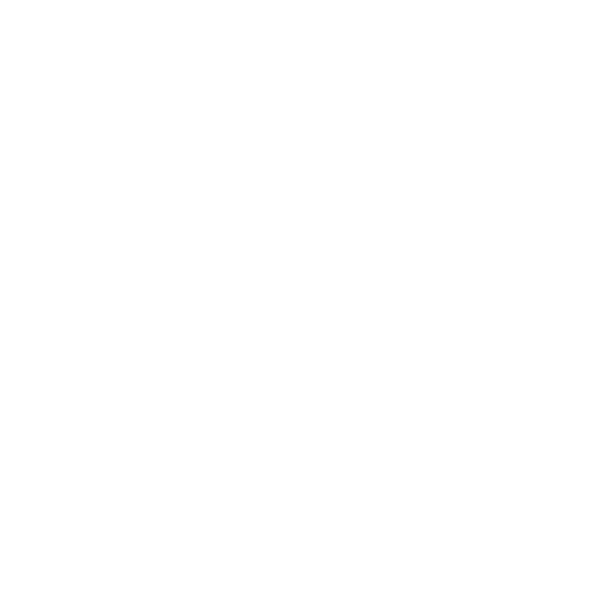

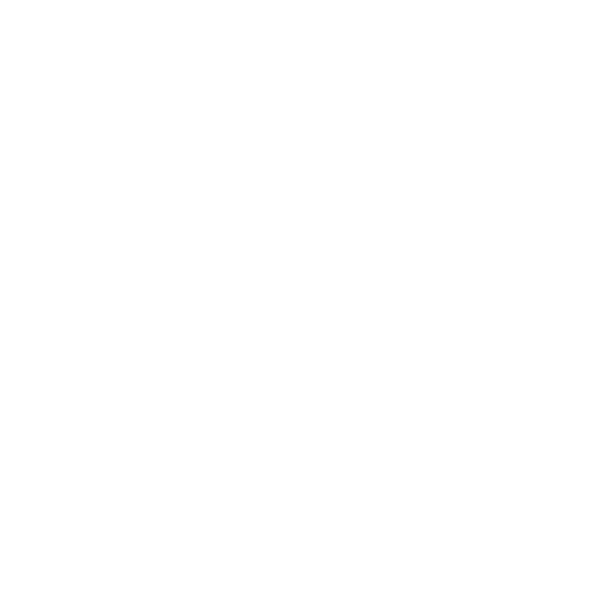

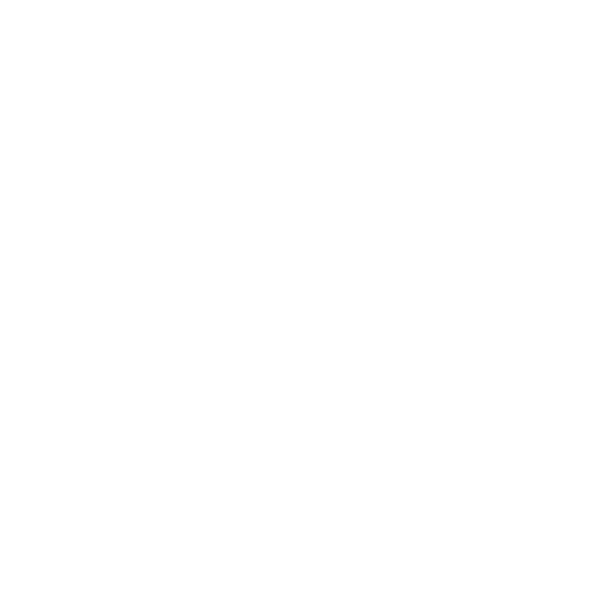

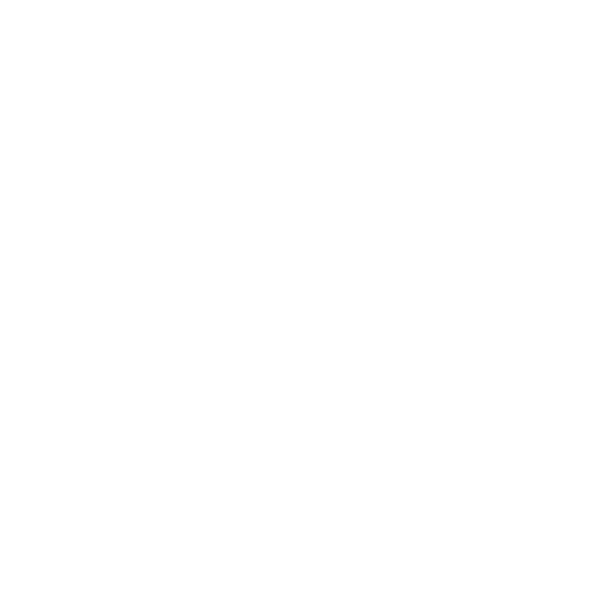

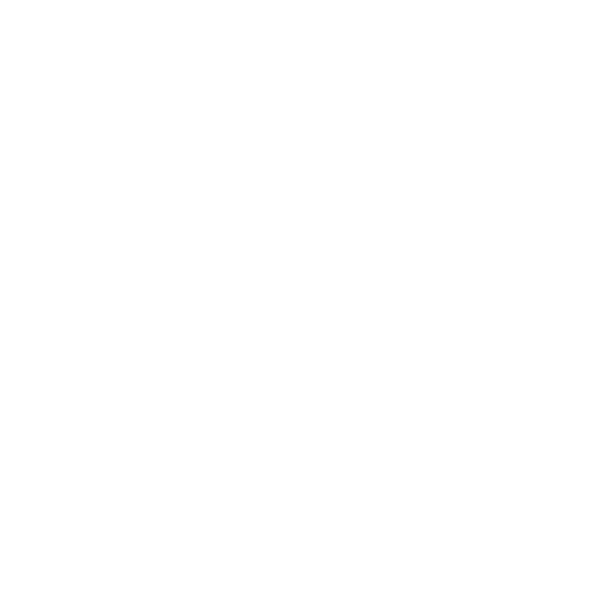

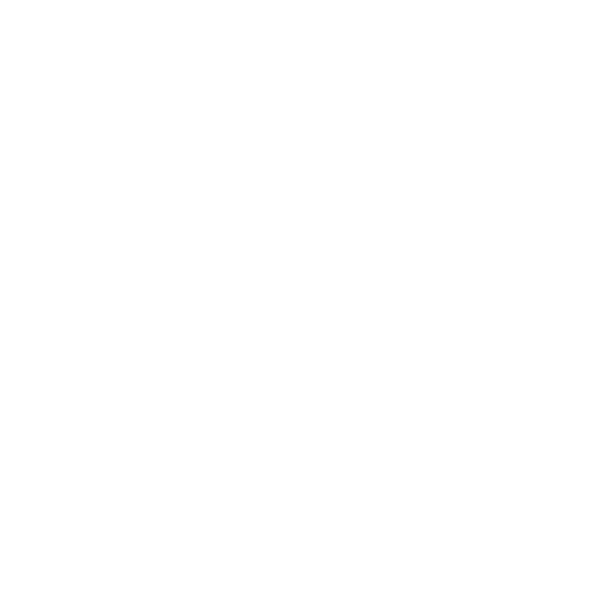

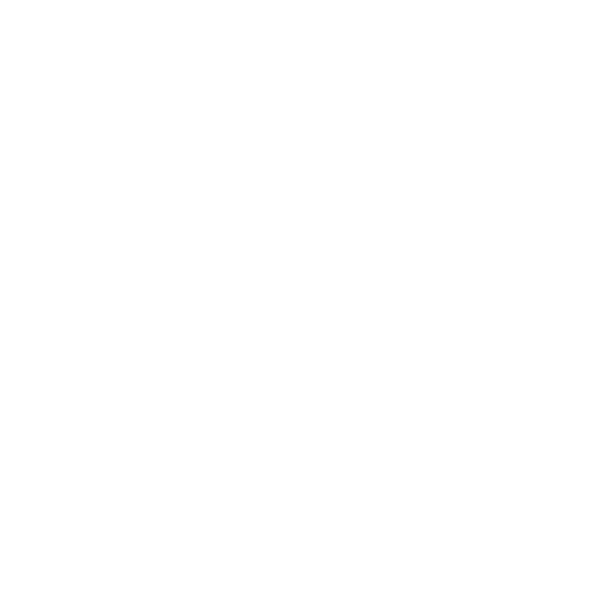

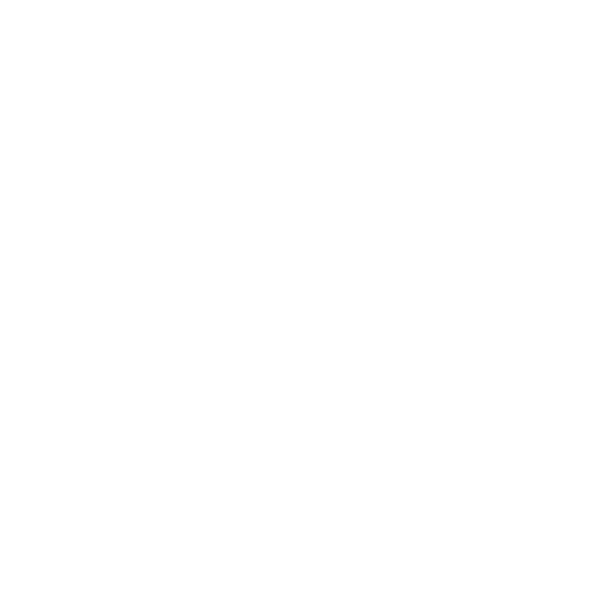

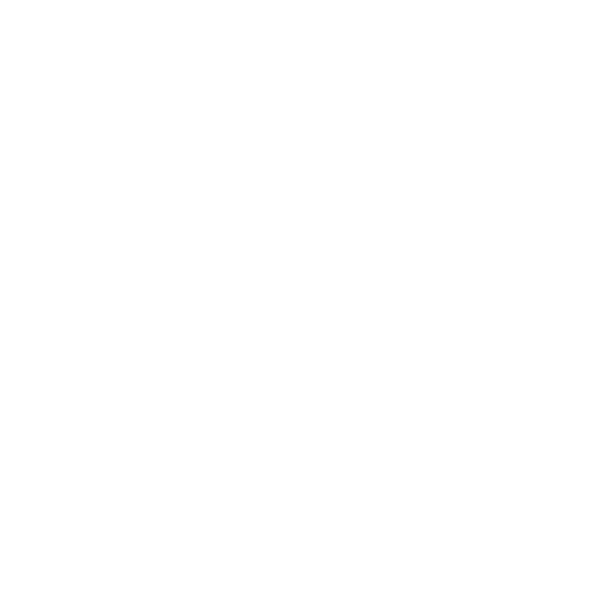

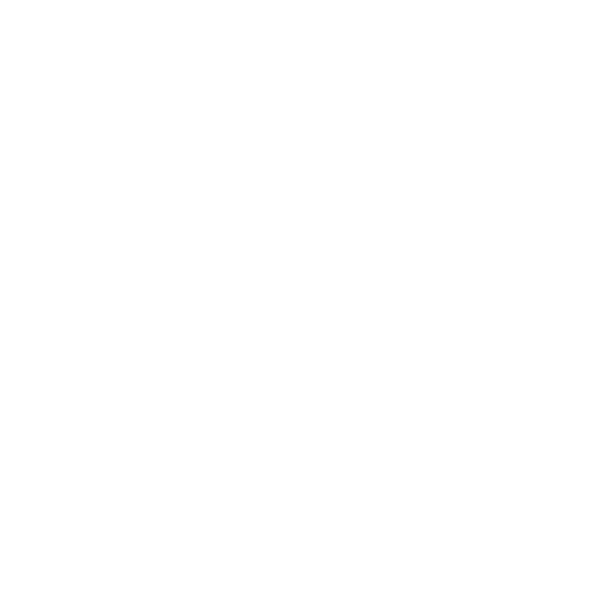

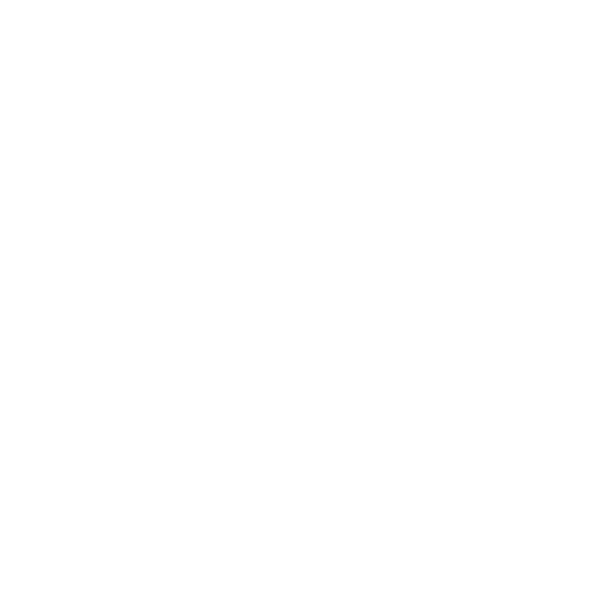

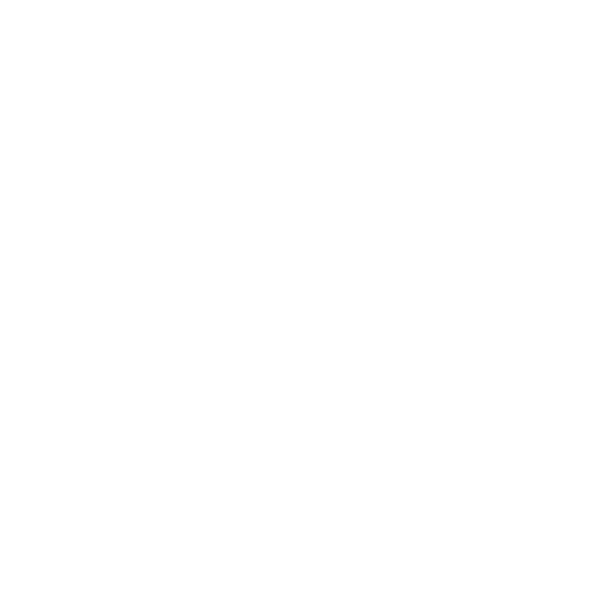

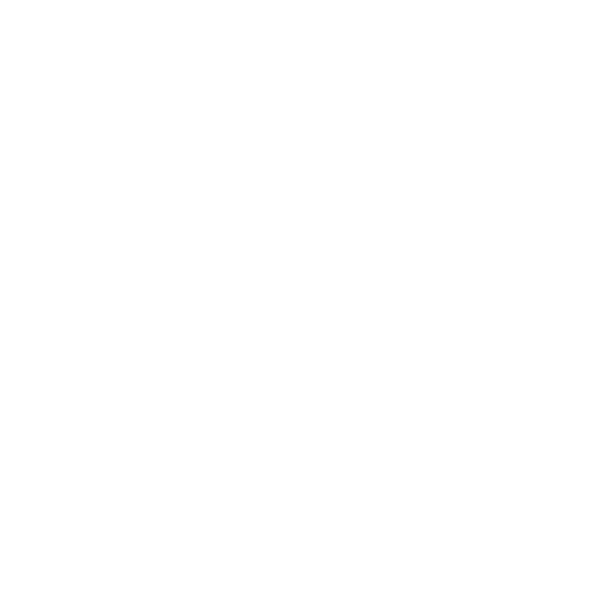

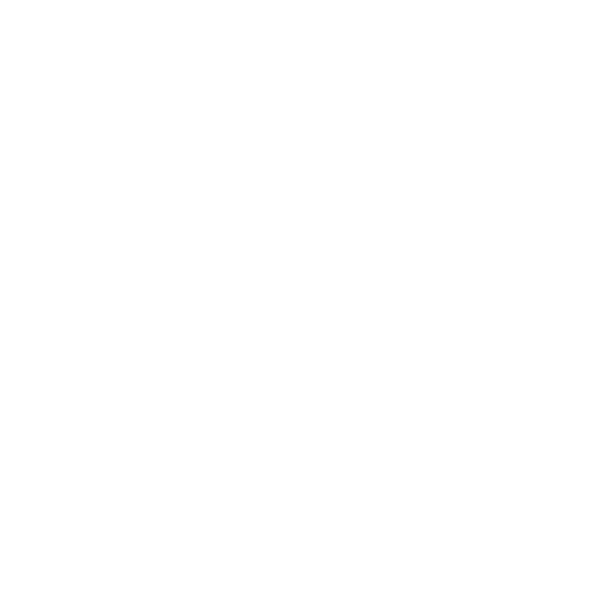

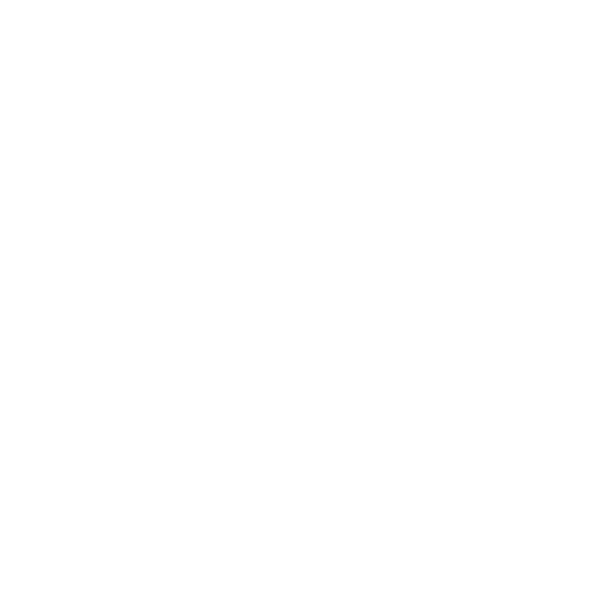

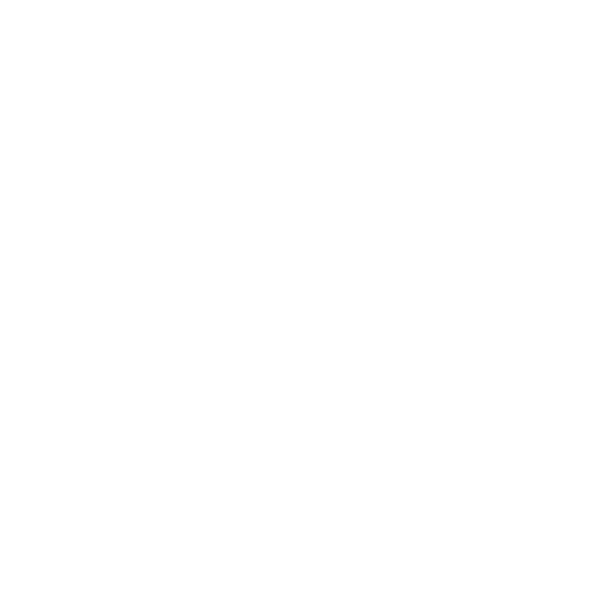

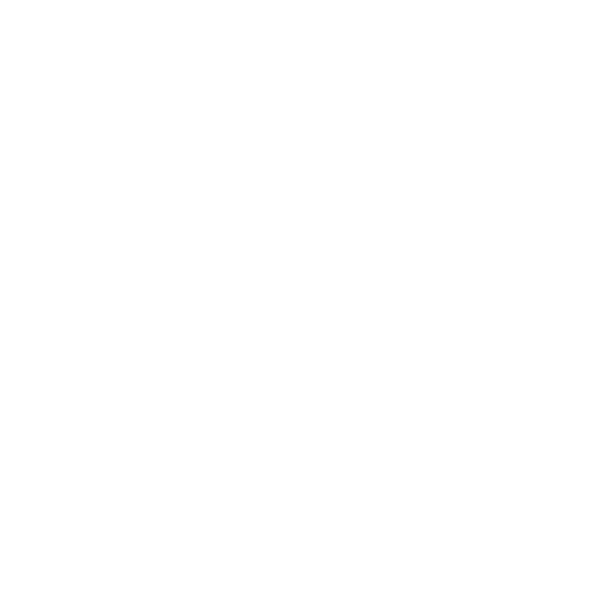

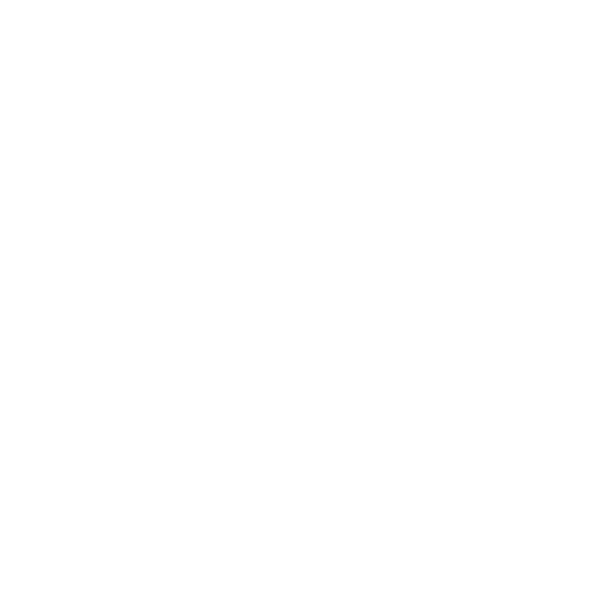

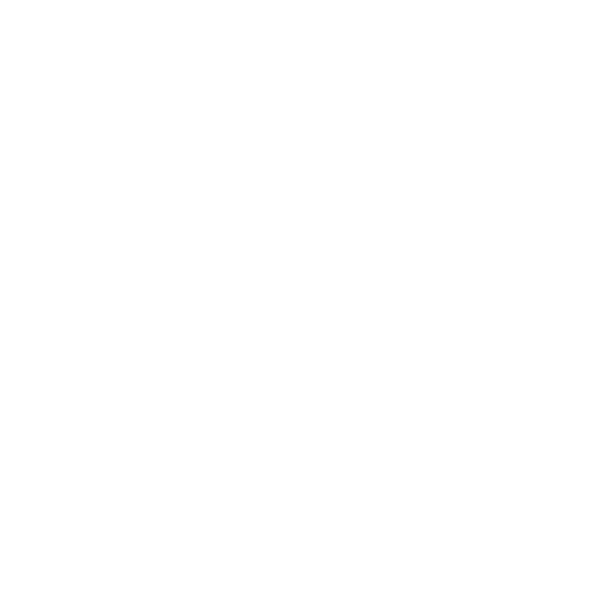

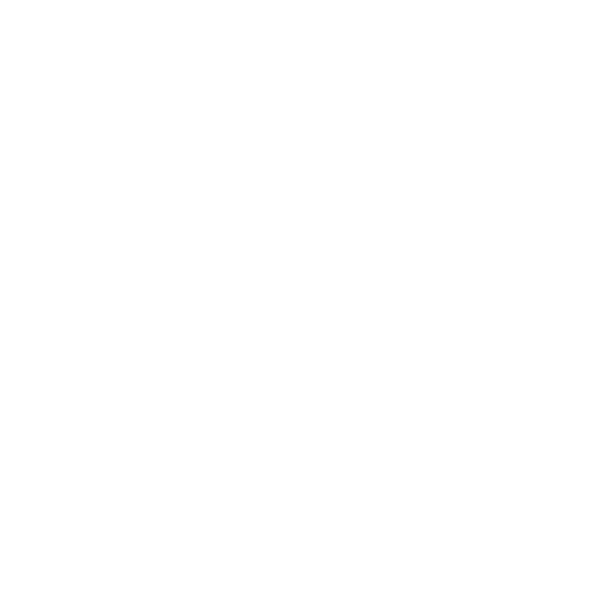

In [300]:
for i in clusters:
    get_word_cloud(new_train_samples_update,i,20)

#### clasify test data  for 20 clusters

In [301]:
new_test_samples

,Original Name,Dashboard Name,Masked Name,tf-idf
0,Degradings Detailed View,degradings detailed view,Dash1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,Grower Economics - weekly supply,grower economics weekly supply,Dash14,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,Nursery Order Status Report,nursery order status,Dash27,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,Pricing - PPV,pricing ppv,Dash31,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,Casey Report,casey,Dash45,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...
96,Report carrier volume PRT-ESP-MOR,carrier volume prt esp mor,Dash981,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
97,KGs Diarios por armazém,kg diarios por armazém,Dash985,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
98,OV - Sample Weights,ov sample weight,Dash990,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
99,Blackberry Daily Harvest Order Action Strategy,blackberry daily harvest order action strategy,Dash993,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.47246535..."


In [302]:
tfidf_result_test=[]
for i in new_test_samples['tf-idf']:
    tfidf_result_test.append(i)
    
data_rescaled_test = scaler.fit_transform(tfidf_result_test)
pca_output_test =principal.transform(data_rescaled_test)

In [305]:
pca_output_test.shape

(101, 527)

In [312]:
type(pca_output_test[0])

numpy.ndarray

In [325]:
test_cluster_number = [kclusterer.classify(pca_output_test[i]) for i in range(pca_output_test.shape[0])]

In [328]:
new_test_samples['assigned_cluster'] = test_cluster_number

In [331]:
new_test_samples['assigned_cluster'].value_counts()

5     18
19    10
13     8
6      7
14     7
10     7
4      7
7      6
12     6
17     5
3      4
2      3
11     3
9      2
15     2
16     2
0      2
8      1
18     1
Name: assigned_cluster, dtype: int64

In [334]:
new_test_samples.to_csv("new_test_samples.csv",index=False)

#### clasify test data  for 10 clusters

In [ ]:
new_test_samples

In [338]:
tfidf_result_test=[]
for i in new_test_samples['tf-idf']:
    tfidf_result_test.append(i)
    
data_rescaled_test = scaler.fit_transform(tfidf_result_test)
pca_output_test = principal.transform(data_rescaled_test)

In [345]:
with open("C:/Users/ShruthiShanbogRamamu/OneDrive - Enquero/Powerme_project/Kmeans-cosine/experiment/wordcloud_with_totalcluster_10/kmeans_10.pkl", 'rb') as handle:
    kmeans_10 = pickle.load(handle)

In [346]:
test_cluster_number = [kmeans_10.classify(pca_output_test[i]) for i in range(pca_output_test.shape[0])]

In [348]:
new_test_samples_cluster10 = new_test_samples

In [349]:
new_test_samples_cluster10['assigned_cluster'] = test_cluster_number

In [352]:
new_test_samples_cluster10['assigned_cluster'].value_counts()

7    23
9    13
1    12
4    10
0     9
2     8
3     7
5     7
8     7
6     5
Name: assigned_cluster, dtype: int64

In [353]:
new_test_samples_cluster10.to_csv('new_test_samples_cluster10.csv',index=False)

#### KNN Recommendations

In [401]:
vectorizer = pickle.load(open("tfidf_entiredata_New.pkl", "rb"))
min_max_loader = pickle.load(open("min_max_scaler.pkl", "rb"))
pca = pickle.load(open("pca_loading.pkl", "rb"))
kmeans = pickle.load(open("C:/Users/ShruthiShanbogRamamu/OneDrive - Enquero/Powerme_project/Kmeans-cosine/experiment/wordcloud_with_totalcluster_20/kmeans_20.pkl", "rb"))

In [396]:
col_names = ["feture_"+str(i) for i in range(0,pca_output.shape[1])]
tarin_df = pd.DataFrame(pca_output,columns=col_names)
new_train_samples_ = pd.concat([new_train_samples,tarin_df],axis=1)
new_train_samples_.drop(['tf-idf','centroid'],axis=1,inplace=True) 

In [398]:
new_train_samples_

,Original Name,Dashboard Name,Masked Name,cluster,feture_0,feture_1,feture_2,feture_3,feture_4,feture_5,...,feture_517,feture_518,feture_519,feture_520,feture_521,feture_522,feture_523,feture_524,feture_525,feture_526
0,Pallet Summary by Order by Day,pallet summary order day,Dash0,8,-0.201026,0.459667,-0.069311,0.154639,0.005006,0.018579,...,-0.006624,0.013650,0.004409,-0.000686,-0.000371,-0.016209,-0.010374,-0.025544,-0.008070,-0.017935
1,Product Leader - Blueberries,product leader blueberry,Dash2,0,0.090284,-0.043623,0.149859,-0.084850,-0.001573,0.120620,...,0.003112,0.015973,-0.010839,-0.001178,0.003352,0.004796,-0.006778,0.004091,0.007545,-0.003242
2,CHL Fruit Details,chl fruit detail,Dash3,6,0.067462,0.043770,-0.130837,-0.079971,-0.189422,0.199751,...,-0.078297,0.098681,-0.033531,-0.092406,-0.020053,-0.011418,-0.064845,-0.047779,-0.033614,-0.053062
3,Product Leader - Raspberries,product leader raspberry,Dash4,0,0.020453,-0.051261,0.039385,-0.061668,-0.064061,0.076123,...,0.002540,0.006045,-0.006809,0.003584,-0.003942,0.010008,0.002987,-0.016870,0.006460,0.002439
4,OV - CMP Dashboard,ov cmp,Dash5,13,-0.042761,-0.105942,0.014664,0.010768,-0.000051,-0.019718,...,0.021542,-0.067069,0.041438,-0.184403,-0.106878,-0.117957,-0.056354,0.176433,-0.046319,0.065849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,Widmann Analysis 2019 # pallets,widmann analysis pallet,Dash989,18,-0.027055,-0.017985,-0.008370,-0.047128,0.018603,-0.041656,...,-0.125411,-0.041447,0.032802,0.001089,0.114465,0.052364,0.023956,0.096990,0.115609,0.065546
892,OV - DEMEA Quality Allocation,ov demea quality allocation,Dash991,13,-0.135902,-0.279688,-0.001480,0.326709,-0.006003,0.036711,...,-0.007605,-0.015312,0.004046,0.012727,0.049464,0.037261,-0.015147,-0.034894,0.005652,-0.062164
893,Blueberry Report by Pack,blueberry pack,Dash992,0,0.109378,-0.007328,0.148158,-0.110890,0.001971,0.112068,...,0.003462,0.007838,0.002030,-0.023196,0.014834,-0.042160,-0.029732,0.003153,-0.026371,-0.003586
894,Daily Pulse,daily pulse,Dash994,4,0.021801,0.031121,0.292212,-0.142743,0.304478,0.242318,...,-0.050916,0.018760,0.079337,-0.042667,0.044823,-0.077758,-0.069404,0.034159,-0.030565,0.042084


In [133]:
from sklearn.neighbors import NearestNeighbors
from sklearn import preprocessing

def get_dashbord_recommedation(dashboard_name):
    res = vectorizer.transform([dashboard_name])
    new= res.toarray()
    min_max_scaled = min_max_loader.transform(new)
    pca_input=min_max_scaled.reshape(1,-1)
    pca_output_=pca.transform(pca_input)
    kmeans_output= kmeans.classify(pca_output_[0])

    col_names = ["feture_"+str(i) for i in range(0,pca_output_.shape[1])]
    col_names
    new_test = pd.DataFrame(pca_output_,columns=col_names)
    new_test['Searched_Dashboard_Name']=[dashboard_name]
    new_test['cluster']=kmeans_output
    new_test = new_test[['Searched_Dashboard_Name','cluster']+col_names]
    sub_set_train = new_train_samples_[new_train_samples_['cluster']==kmeans_output].reset_index(drop=True)
    #train = sub_set_train
    # test = new_test

    X = sub_set_train[col_names]
    cluster_group_size = sub_set_train.shape[0]
    if cluster_group_size >= 100:
        cluster_group_size=100
    else:
        cluster_group_size=cluster_group_size
    nbrs = NearestNeighbors(n_neighbors=cluster_group_size, algorithm='auto',metric='cosine').fit(X)
    distances, indices = nbrs.kneighbors(new_test[col_names])
    #print(preprocessing.normalize(distances)*100)
    #print((1-preprocessing.normalize(distances))*100)
    similarity_score = (1-preprocessing.normalize(distances))*100
    output = pd.DataFrame(sub_set_train.iloc[indices[0]]).reset_index(drop=True)
    pd.set_option('precision',8)
    df = pd.DataFrame({'similarity_score':similarity_score[0]})
    output['similarity_score'] = np.round(similarity_score[0],10)
    output['Searched_Dashboard_Name'] = dashboard_name
    output.sort_values(['similarity_score'],ascending=False,inplace=True)
    output1 = output.head(3).reset_index(drop=True)
    output1 = output1[['Searched_Dashboard_Name','Original Name','similarity_score','cluster']]
    output1.rename(columns={'Original Name':"recommended_dashbord"},inplace=True)
    return output1 

In [134]:
dashboard_name = 'ov sample weight'
out = get_dashbord_recommedation(dashboard_name)
out

,Searched_Dashboard_Name,recommended_dashbord,similarity_score,cluster
0,ov sample weight,OV - Grower to Customer (Sold Weight),93.01879213,13
1,ov sample weight,OV- wPfQ & Weight PRT,90.58461863,13
2,ov sample weight,OV - Allocation Dashboard,86.22191436,13


In [136]:
dashboard_name  = 'ov product leadership blue monitor'
out = get_dashbord_recommedation(dashboard_name)
out

,Searched_Dashboard_Name,recommended_dashbord,similarity_score,cluster
0,ov product leadership blue monitor,OV - Product Leadership: Rasps Monitor,98.44708671,13
1,ov product leadership blue monitor,OV - Product Leadership: Blacks Monitor,98.42406836,13
2,ov product leadership blue monitor,OV - Product Leadership: Straws Monitor,97.70396447,13


In [137]:
dashboard_name = 'settlement production blackberry test'
rec_dash_output = get_dashbord_recommedation(dashboard_name)

In [138]:
rec_dash_output

,Searched_Dashboard_Name,recommended_dashbord,similarity_score,cluster
0,settlement production blackberry test,Settlement- Production Report,93.34104340,12
1,settlement production blackberry test,Settlement BLUE,87.29213771,12
2,settlement production blackberry test,Settlement RASP,87.09391976,12
